In [1]:
import os
import glob
import tensorflow as tf
import data
import model
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import fitsio
import matplotlib.colors as colors
import sunpy.visualization.colormaps as cm
aia193 = matplotlib.colormaps['sdoaia193']
cv2.setNumThreads(1)

2023-05-02 14:56:16.595239: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-02 14:56:16.640161: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 14:56:17.413724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
resunet0 = tf.keras.models.load_model('trainedUNet_resNet_0')
resunet1 = tf.keras.models.load_model('trainedUNet_resNet_1')

2023-05-02 14:56:24.902835: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 47164 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:15:00.0, compute capability: 7.5
2023-05-02 14:56:24.903666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 45864 MB memory:  -> device: 1, name: Quadro RTX 8000, pci bus id: 0000:2d:00.0, compute capability: 7.5


In [3]:
# Check inputs
images = sorted(glob.glob(os.path.join(os.environ['DATA'], 'SDO/AIA/jp2_data/curated/2011/*/fits/*.fits')))
masks = sorted(glob.glob(os.path.join(os.environ['DATA'], 'SDO/AIA/jp2_data/curated/2011/*/label/*.npz')))
len(images), len(masks)

(1349, 1349)

In [4]:
n = 77
print(images[n])
image = fitsio.read(images[n])
mask = np.load(masks[n])['arr_0']
x = data.preprocess_array(image, True, output_size=(256, 256))
x_test = np.reshape(x, [1, 256, 256, 1])
print(x.shape, x_test.shape)

/mnt/data2/SDO/AIA/jp2_data/curated/2011/01/fits/2011_01_31__21_59_55_84__SDO_AIA_AIA_193.fits
(256, 256) (1, 256, 256, 1)


1/1 [==============================] - 0s 27ms/step


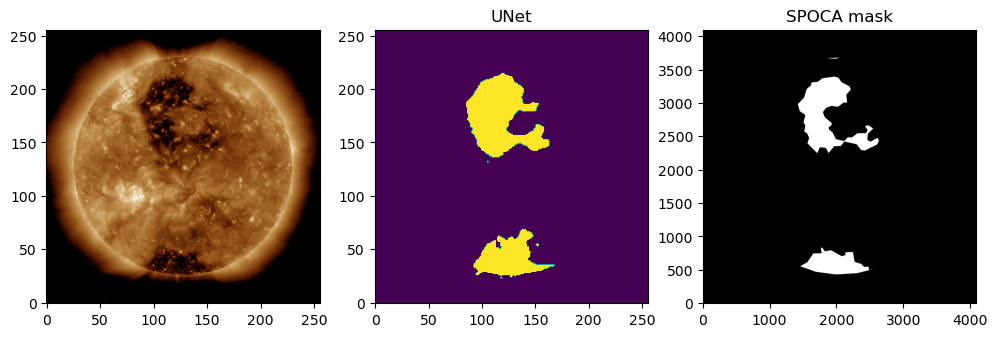

In [11]:
y_predict = resunet0.predict(x_test)
y_predict.shape

fig, axs= plt.subplots(ncols=3, nrows=1, figsize=(12, 6))
axs[0].imshow(x, origin='lower', cmap=aia193, vmin=0, vmax=1)
axs[1].imshow(np.squeeze(y_predict)>0.5, origin='lower')
axs[1].set_title('UNet')
axs[2].imshow(mask, vmin=0, vmax=1, cmap='gray', origin='lower')
axs[2].set_title('SPOCA mask')
plt.savefig('Unet_predict.png')

1/1 [==============================] - 0s 27ms/step


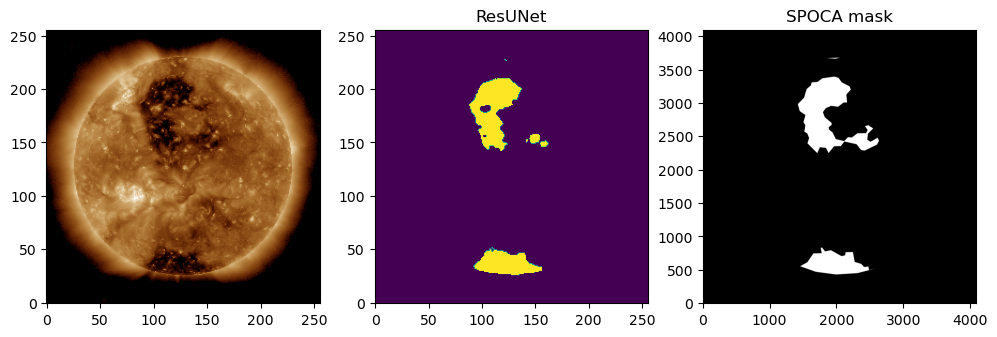

In [12]:
y_predict = resunet1.predict(x_test)
y_predict.shape

fig, axs= plt.subplots(ncols=3, nrows=1, figsize=(12, 6))
axs[0].imshow(x, origin='lower', cmap=aia193, vmin=0, vmax=1)
axs[1].imshow(np.squeeze(y_predict)>0.5, origin='lower')
axs[1].set_title('ResUNet')
axs[2].imshow(mask, vmin=0, vmax=1, cmap='gray', origin='lower')
axs[2].set_title('SPOCA mask')
plt.savefig('ResUNet_predict.png')